# Aula 2

In [ ]:
import sklearn
from sklearn import datasets  
import pandas as pd

In [ ]:
help(sklearn)

In [ ]:
boston = datasets.load_boston()

In [ ]:
df = pd.DataFrame(boston.data)

In [ ]:
df.head()

In [ ]:
print(boston.DESCR)

### Bases de datos

In [ ]:
base_de_credito = pd.read_csv('base_de_credito.csv', sep=';')

In [ ]:
base_de_credito.head()

,edad,salario,persona_propietaria_de_vivienda,anos_de_trabajo,destino_del_prestamo,calificacion_de_riesgo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,morosidad_historica,anos_historial_crediticio
0,22,59000,RENT,3.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
base_de_credito.describe()

,edad,salario,anos_de_trabajo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,anos_historial_crediticio
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.785899,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.089065,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Base de entrenamiento y base de test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = base_de_credito[['edad', 'vr_prestamo']]
y = base_de_credito['status_prestamo']

In [ ]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22806 entries, 28000 to 1545
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   edad         22806 non-null  int64
 1   vr_prestamo  22806 non-null  int64
dtypes: int64(2)
memory usage: 534.5 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9775 entries, 27679 to 21407
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   edad         9775 non-null   int64
 1   vr_prestamo  9775 non-null   int64
dtypes: int64(2)
memory usage: 229.1 KB


# Aula 3

### Tratamiento de datos

In [ ]:
base_de_credito.head()

,edad,salario,persona_propietaria_de_vivienda,anos_de_trabajo,destino_del_prestamo,calificacion_de_riesgo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,morosidad_historica,anos_historial_crediticio
0,22,59000,RENT,3.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
base_de_credito.describe()

,edad,salario,anos_de_trabajo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,anos_historial_crediticio
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.785899,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.089065,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
base_de_credito.dropna(inplace=True)

In [ ]:
base_de_credito.describe()

,edad,salario,anos_de_trabajo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,anos_historial_crediticio
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.784482,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.095491,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
base_de_credito[base_de_credito['edad']>80]

,edad,salario,persona_propietaria_de_vivienda,anos_de_trabajo,destino_del_prestamo,calificacion_de_riesgo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,morosidad_historica,anos_historial_crediticio
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


In [ ]:
base_de_credito = base_de_credito[base_de_credito['edad']<=85]

In [ ]:
base_de_credito[base_de_credito['anos_de_trabajo']>50]

,edad,salario,persona_propietaria_de_vivienda,anos_de_trabajo,destino_del_prestamo,calificacion_de_riesgo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,morosidad_historica,anos_historial_crediticio
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.1,N,4


In [ ]:
base_de_credito = base_de_credito[base_de_credito['anos_de_trabajo']<=50]

In [ ]:
base_de_credito.describe()

,edad,salario,anos_de_trabajo,vr_prestamo,tasa_de_interes,status_prestamo,prestamo_perc_ingreso,anos_historial_crediticio
count,28633.000000,2.863300e+04,28633.000000,28633.000000,28633.000000,28633.000000,28633.000000,28633.000000
mean,27.711941,6.642625e+04,4.780254,9656.216603,11.039875,0.216638,0.169504,5.793455
std,6.171973,5.154658e+04,4.035560,6329.460638,3.229487,0.411961,0.106388,4.037096
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
x = base_de_credito.drop('status_prestamo', axis=1)
y = base_de_credito['status_prestamo']

In [ ]:
x.head()

,edad,salario,persona_propietaria_de_vivienda,anos_de_trabajo,destino_del_prestamo,calificacion_de_riesgo,vr_prestamo,tasa_de_interes,prestamo_perc_ingreso,morosidad_historica,anos_historial_crediticio
0,22,59000,RENT,3.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.head()

,edad,salario,anos_de_trabajo,vr_prestamo,tasa_de_interes,prestamo_perc_ingreso,anos_historial_crediticio,persona_propietaria_de_vivienda_MORTGAGE,persona_propietaria_de_vivienda_OTHER,persona_propietaria_de_vivienda_OWN,persona_propietaria_de_vivienda_RENT,destino_del_prestamo_DEBTCONSOLIDATION,destino_del_prestamo_EDUCATION,destino_del_prestamo_HOMEIMPROVEMENT,destino_del_prestamo_MEDICAL,destino_del_prestamo_PERSONAL,destino_del_prestamo_VENTURE,calificacion_de_riesgo_A,calificacion_de_riesgo_B,calificacion_de_riesgo_C,calificacion_de_riesgo_D,calificacion_de_riesgo_E,calificacion_de_riesgo_F,calificacion_de_riesgo_G,morosidad_historica_N,morosidad_historica_Y
0,22,59000,3.0,35000,16.02,0.59,3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x, y, test_size = 0.3)

### Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dtc = DecisionTreeClassifier(max_depth=4)

In [ ]:
dtc.fit(x_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicciones = dtc.predict(x_test)

In [ ]:
predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test, predicciones)

0.8933643771827706

In [ ]:
columnas = x.columns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
tree.plot_tree(dtc, feature_names=columnas, class_names=['0', '1'], filled=True);

### Bosques aleatorios

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 50)

In [ ]:
rfc.fit(x_entrenamiento, y_entrenamiento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predicciones_rfc = rfc.predict(x_test)

In [ ]:
accuracy_score(y_test, predicciones_rfc)

0.9318975552968568

# Aula 4

### Regresión lineal simple

In [ ]:
precio_de_casas = pd.read_csv('precio_de_casas.csv', sep=';')

In [ ]:
precio_de_casas.head()

,id,fecha,precio,nr_habitaciones,nr_banos,sqft_casa,sqft_lote,niveles,frente_al_mar,vista,condicion,nota,sqft_nivel_superior,sqft_sotano,ano_construccion,ano_renovacion,zipcode,lat,long,sqft_casa15,sqft_lote15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,475.112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,477.379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,475.208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,476.168,-122.045,1800,7503


In [ ]:
precio_de_casas.isnull().sum()

id                     0
fecha                  0
precio                 0
nr_habitaciones        0
nr_banos               0
sqft_casa              0
sqft_lote              0
niveles                0
frente_al_mar          0
vista                  0
condicion              0
nota                   0
sqft_nivel_superior    0
sqft_sotano            0
ano_construccion       0
ano_renovacion         0
zipcode                0
lat                    0
long                   0
sqft_casa15            0
sqft_lote15            0
dtype: int64

In [ ]:
precio_de_casas.describe()

,id,precio,nr_habitaciones,nr_banos,sqft_casa,sqft_lote,niveles,frente_al_mar,vista,condicion,nota,sqft_nivel_superior,sqft_sotano,ano_construccion,ano_renovacion,zipcode,lat,long,sqft_casa15,sqft_lote15
count,2.012100e+04,20121.000000,20121.000000,20121.000000,20121.000000,2.012100e+04,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000
mean,4.609932e+09,466986.581084,3.319567,2.037672,1953.810496,1.451278e+04,1.470976,0.002883,0.161324,3.404254,7.502311,1691.380249,262.430247,1970.760400,72.584066,98078.578351,430.650288,-122.213168,1907.477958,12384.936385
std,2.878188e+09,195521.038243,0.910432,0.703034,755.079903,3.999895e+04,0.536332,0.053613,0.617358,0.645515,1.013726,711.080573,403.723663,29.099884,373.584717,53.306597,131.166422,0.142589,600.359587,26455.541564
min,1.000102e+06,75000.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.519000,399.000000,651.000000
25%,2.140950e+09,313999.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,473.772000,-122.330000,1460.000000,5040.000000
50%,3.905120e+09,433000.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1500.000000,0.000000,1974.000000,0.000000,98065.000000,475.452000,-122.233000,1790.000000,7529.000000
75%,7.340601e+09,592000.000000,4.000000,2.500000,2410.000000,1.025400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2080.000000,500.000000,1996.000000,0.000000,98118.000000,476.715000,-122.122000,2260.000000,9832.000000
max,9.900000e+09,999999.000000,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000,4950.000000,871200.000000


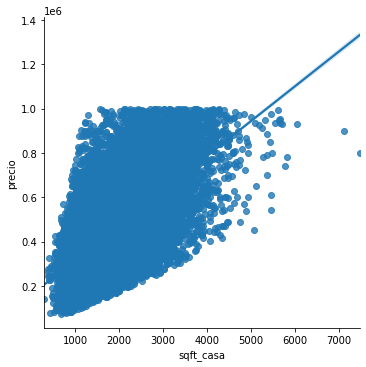

In [ ]:
sns.lmplot(x='sqft_casa', y='precio', data=precio_de_casas)

In [ ]:
x = precio_de_casas['sqft_casa'].values.reshape(-1,1)
type(x)

numpy.ndarray

In [ ]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [ ]:
y = precio_de_casas['precio'].values

In [ ]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
rls = LinearRegression(fit_intercept=True)

In [ ]:
rls.fit(x_entrenamiento, y_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#b0
rls.intercept_

161489.75400333252

In [ ]:
#b1
rls.coef_

array([156.34719116])

In [ ]:
rls.score(x_entrenamiento, y_entrenamiento)

0.36728008623038944

In [ ]:
rls.score(x_test, y_test)

0.3609370913431075

### Regresión lineal múltiple

In [ ]:
x = precio_de_casas.drop(['id', 'precio','fecha'], axis=1).values

In [ ]:
y = precio_de_casas['precio'].values

In [ ]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
rlm = LinearRegression(fit_intercept=True)

In [ ]:
rlm.fit(x_entrenamiento, y_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#b0
rlm.intercept_

-10765598.991788125

In [ ]:
#coeficientes
rlm.coef_

array([-1.05594252e+04,  2.50345446e+04,  4.02193423e+01,  1.66111201e-01,
        4.90934527e+04,  1.03574389e+05,  1.54085824e+04,  1.88292632e+04,
        8.68424946e+04,  5.05203833e+00,  3.51673039e+01, -2.43720633e+03,
        3.81405556e+00,  1.86655635e+02,  6.65537729e+00,  2.70047073e+04,
        6.46895539e+01, -2.63960891e-01])

In [ ]:
len(rlm.coef_)

18

In [ ]:
rlm.score(x_entrenamiento, y_entrenamiento)

0.5638554587810405

In [ ]:
rlm.score(x_test, y_test)

0.5556977402404664